In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from collections import Counter

In [39]:
dfLiwc = pd.read_csv('data/camoes_liwc.csv', index_col=0,sep=";")

In [40]:
dfTags = pd.read_csv('data/camoes_postagger.csv', index_col=0)

In [41]:
dfUdep = pd.read_csv('data/camoes_udep.csv', index_col=0,sep=";")

In [43]:
dfUdep

,titulo,autor,ano,genero,ADVCL,ADVMOD,AMOD,APPOS,AUX,CASE,...,PARATAXIS,POBJ,POSS,PRECONJ,PREDET,PUNCT,ROOT,S,SJ,XCOMP
id,,,,,,,,,,,,,,,,,,,,,
1,A virtude laureada,Manoel Maria de Barbosa du Bocage,1805,Drama,21,259,569,8,3,591,...,204,174,92,1,0,300,227,0,0,26
2,Os Pobres,Raul Brandão,1906,Novel,35,411,525,2,19,672,...,235,236,74,2,1,740,506,0,0,61
3,Raios de extincta luz,Antero de Quental,1892,Poetry,41,351,548,5,7,749,...,172,315,80,4,0,544,368,0,0,45
4,Dispersão,Mário Sá-Carneiro,1914,Petry,49,418,416,15,3,610,...,259,209,81,6,0,727,546,0,0,46
5,Cantos Sagrados,Manuel de Arriaga,1899,Poetry,24,272,643,5,10,870,...,130,364,128,1,0,324,253,0,0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Auto da Índia,Gil Vicente,1509,Drama,27,431,497,5,5,367,...,186,120,66,0,0,638,564,0,0,48
192,Farsa de Inês Pereira,Gil Vicente,1523,Drama,48,517,426,6,28,424,...,195,113,64,1,1,616,508,0,0,87
193,A Cidade e a Infância,Luandino Vieira,1960,Tale,40,448,460,10,21,1013,...,139,449,70,0,2,739,664,0,0,48


In [45]:
dfUdep.iloc[:,4:196]

,ADVCL,ADVMOD,AMOD,APPOS,AUX,CASE,CC,CCOMP,COMP,CONJ,...,PARATAXIS,POBJ,POSS,PRECONJ,PREDET,PUNCT,ROOT,S,SJ,XCOMP
id,,,,,,,,,,,,,,,,,,,,,
1,21,259,569,8,3,591,316,27,0,18,...,204,174,92,1,0,300,227,0,0,26
2,35,411,525,2,19,672,483,76,1,26,...,235,236,74,2,1,740,506,0,0,61
3,41,351,548,5,7,749,370,50,0,30,...,172,315,80,4,0,544,368,0,0,45
4,49,418,416,15,3,610,433,67,0,17,...,259,209,81,6,0,727,546,0,0,46
5,24,272,643,5,10,870,359,53,0,32,...,130,364,128,1,0,324,253,0,0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,27,431,497,5,5,367,314,53,0,27,...,186,120,66,0,0,638,564,0,0,48
192,48,517,426,6,28,424,373,78,1,60,...,195,113,64,1,1,616,508,0,0,87
193,40,448,460,10,21,1013,345,68,0,16,...,139,449,70,0,2,739,664,0,0,48


In [5]:
dfTags.iloc[:,3:82]

,ADJ,ADV,CARD,CJ,CL,CN,DA,DEM,DFR,DGT,...,PREPDEM,PRS,QNT,REL,STT,SYB,UM,V,VAUX,WD
1,579,292,17,312,213,1434,1089,25,0,44,...,0,73,32,156,12,0,2,779,0,0
2,466,422,12,498,317,1598,967,58,0,3,...,0,93,72,191,2,0,169,1078,8,0
3,530,394,18,497,214,1601,995,95,0,69,...,0,55,61,191,14,13,131,865,3,0
4,338,450,3,476,357,1565,552,28,0,28,...,0,207,70,140,6,0,127,1060,0,6
5,647,276,19,506,163,1741,1258,76,0,29,...,0,89,63,213,5,9,99,679,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,504,541,68,421,327,1321,367,159,0,307,...,0,230,59,233,5,0,25,1170,2,8
192,337,622,14,528,322,1105,374,125,0,419,...,0,249,46,191,7,0,14,1167,2,0
193,411,514,21,478,232,1745,1234,67,0,20,...,0,211,63,126,4,0,107,1029,6,4
194,338,455,41,391,150,2008,1132,76,0,10,...,0,161,46,162,6,3,89,904,18,0


In [46]:
df1 = pd.concat([dfLiwc, dfTags.iloc[:,3:82], dfUdep.iloc[:,4:196]], axis=1)
df1

,titulo,autor,ano,genero,achieve,adverb,affect,anger,anx,article,...,PARATAXIS,POBJ,POSS,PRECONJ,PREDET,PUNCT,ROOT,S,SJ,XCOMP
1,A virtude laureada,Manoel Maria de Barbosa du Bocage,1805,Drama,70,67,663,100,84,554,...,204,174,92,1,0,300,227,0,0,26
2,Os Pobres,Raul Brandão,1906,Novel,74,177,603,99,63,789,...,235,236,74,2,1,740,506,0,0,61
3,Raios de extincta luz,Antero de Quental,1892,Poetry,91,152,596,75,44,636,...,172,315,80,4,0,544,368,0,0,45
4,Dispersão,Mário Sá-Carneiro,1914,Petry,113,131,538,70,64,366,...,259,209,81,6,0,727,546,0,0,46
5,Cantos Sagrados,Manuel de Arriaga,1899,Poetry,90,149,568,58,30,684,...,130,364,128,1,0,324,253,0,0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Auto da Índia,Gil Vicente,1509,Drama,112,207,465,114,27,199,...,186,120,66,0,0,638,564,0,0,48
192,Farsa de Inês Pereira,Gil Vicente,1523,Drama,82,185,500,80,20,254,...,195,113,64,1,1,616,508,0,0,87
193,A Cidade e a Infância,Luandino Vieira,1960,Tale,114,208,549,71,49,674,...,139,449,70,0,2,739,664,0,0,48
194,KAPAPA,JOSÉ LUANDINO VIEIRA,1998,Novel,107,198,529,74,40,594,...,244,447,208,1,1,335,245,0,0,64


In [47]:
y = df1.iloc[:,3].values

In [48]:
for x in Counter(y).most_common():
  print(x)

('Tale', 93)
('Novel', 25)
('Short story', 20)
('Chronicle', 16)
('Poetry', 13)
('Drama', 9)
('Essay', 8)
('Poem', 3)
('Petry', 1)
('Other', 1)
('Anthology', 1)
('Narrative', 1)
('Letter', 1)
('Memoirs', 1)
('Script', 1)
('Allegory', 1)


## Filtrando dados

In [49]:
df = df1[df1.genero.isin(["Tale", "Novel", "Short story", "Chronicle", "Poetry"])]

In [51]:
X = df.iloc[:,4:183].values
y = df.iloc[:,3].values

In [52]:
X

array([[ 74, 177, 603, ...,   0,   0,  61],
       [ 91, 152, 596, ...,   0,   0,  45],
       [ 90, 149, 568, ...,   0,   0,  23],
       ...,
       [155, 330, 672, ...,   0,   0,  47],
       [114, 208, 549, ...,   0,   0,  48],
       [107, 198, 529, ...,   0,   0,  64]])

In [53]:
for x in Counter(y).most_common():
  print(x)

('Tale', 93)
('Novel', 25)
('Short story', 20)
('Chronicle', 16)
('Poetry', 13)


## Machine Learning: Random Forests

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   Chronicle       1.00      0.33      0.50         3
       Novel       0.50      0.20      0.29         5
      Poetry       0.75      1.00      0.86         3
 Short story       1.00      0.25      0.40         4
        Tale       0.69      0.95      0.80        19

    accuracy                           0.71        34
   macro avg       0.79      0.55      0.57        34
weighted avg       0.73      0.71      0.66        34



## Random Forests Hyperparameter tuning

In [55]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [56]:
le = preprocessing.LabelEncoder()
rf = RandomForestClassifier(random_state = 42)

In [57]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
              }
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [58]:
rf_random = GridSearchCV(
    estimator = rf, 
    param_grid = random_grid, 
    cv = 3, 
    verbose=1, 
    n_jobs = -1,
    scoring='f1_micro'
)

In [59]:
# Fit the random search model
rf_random.fit(X, y)

Fitting 3 folds for each of 4320 candidates, totalling 12960 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       110, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400,
                                          1600, 1800, 2000]},
             scoring='f1_micro', verbose=1)

In [60]:
rf_random.best_score_

0.670887445887446

In [61]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

### Using best parameters

In [62]:
classifier = RandomForestClassifier(
    bootstrap=False,
    max_depth=10,
    max_features='auto',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200, 
    random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   Chronicle       1.00      0.33      0.50         3
       Novel       0.50      0.20      0.29         5
      Poetry       0.75      1.00      0.86         3
 Short story       1.00      0.25      0.40         4
        Tale       0.69      0.95      0.80        19

    accuracy                           0.71        34
   macro avg       0.79      0.55      0.57        34
weighted avg       0.73      0.71      0.66        34



In [63]:
from sklearn.model_selection import cross_validate

In [64]:
scores = cross_validate(classifier, X, y, cv=5, scoring=['f1_micro', 'precision_micro', 'recall_micro'])

In [65]:
print(scores)

{'fit_time': array([0.51417041, 0.51579881, 0.40710545, 0.37375331, 0.3612709 ]), 'score_time': array([0.04331493, 0.04286218, 0.03071547, 0.03104973, 0.03059268]), 'test_f1_micro': array([0.67647059, 0.70588235, 0.57575758, 0.75757576, 0.63636364]), 'test_precision_micro': array([0.67647059, 0.70588235, 0.57575758, 0.75757576, 0.63636364]), 'test_recall_micro': array([0.67647059, 0.70588235, 0.57575758, 0.75757576, 0.63636364])}


In [66]:
print("%0.2f f1 micro desvio: %0.2f" % (scores['test_f1_micro'].mean(), scores['test_f1_micro'].std()))
print("%0.2f prec micro desvio: %0.2f" % (scores['test_precision_micro'].mean(), scores['test_precision_micro'].std()))
print("%0.2f rec micro desvio: %0.2f" % (scores['test_recall_micro'].mean(), scores['test_recall_micro'].std()))

0.67 f1 micro desvio: 0.06
0.67 prec micro desvio: 0.06
0.67 rec micro desvio: 0.06


In [67]:
# features names
fn = list(df.columns[4:])

In [68]:
len(fn)

178

In [69]:
# class names
cn = []
for x in y:
  if x not in cn:
    cn.append(x)

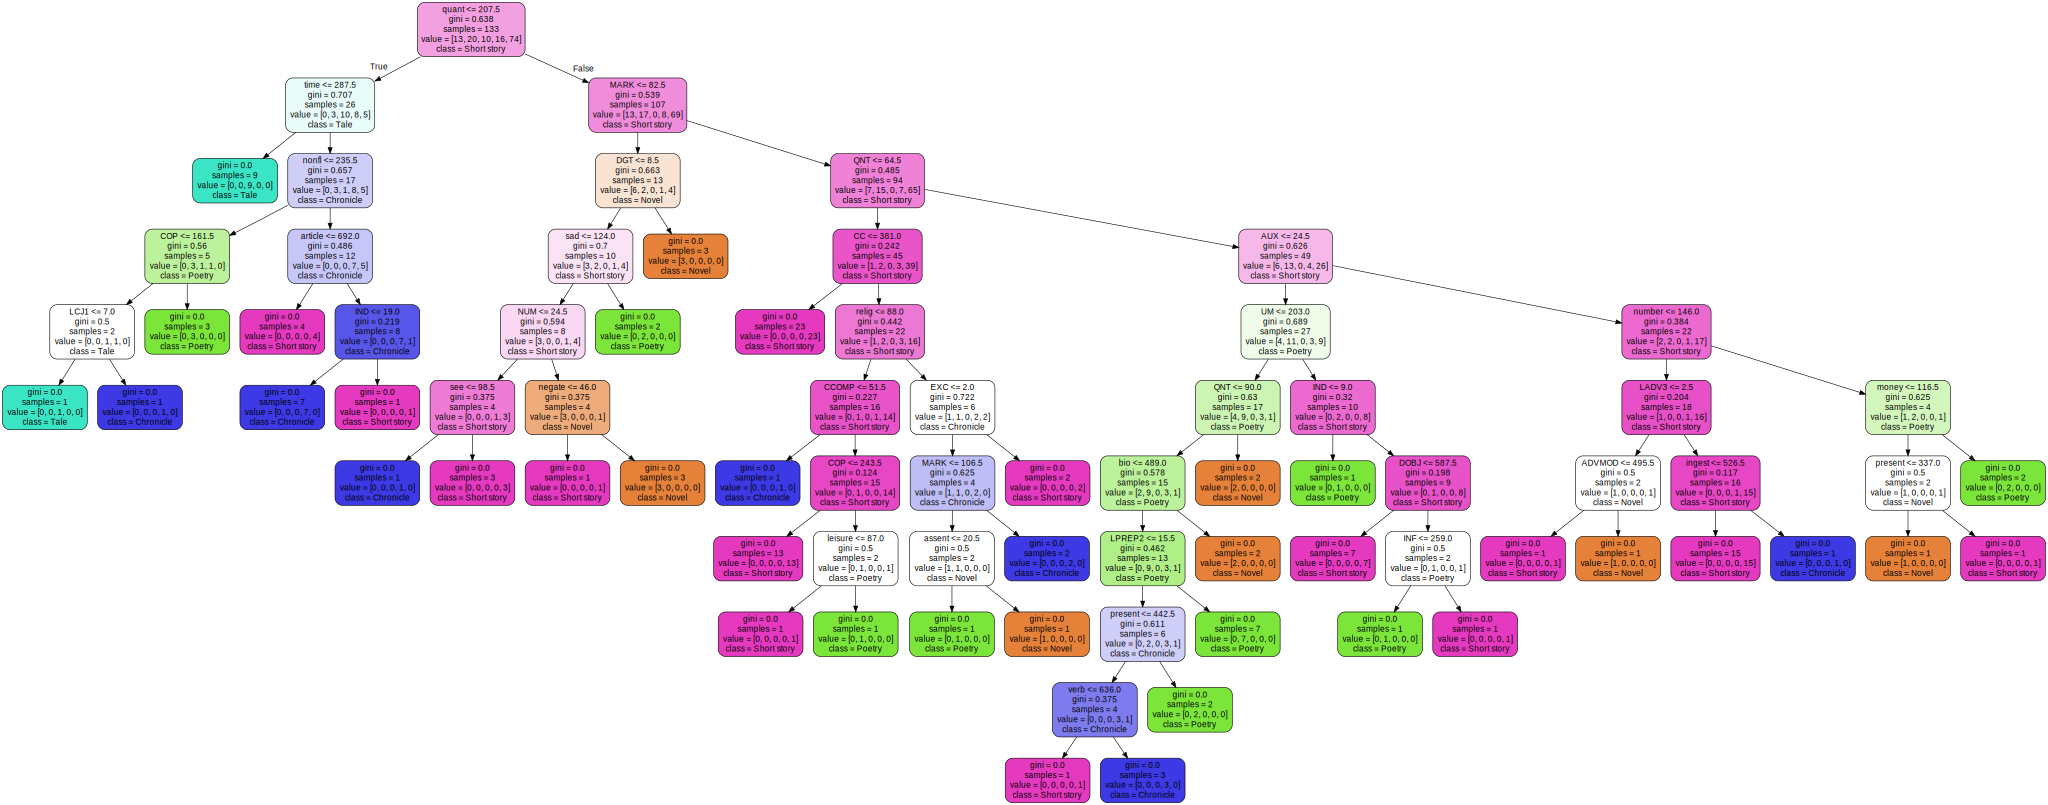

In [70]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(classifier.estimators_[0], 
                           feature_names=fn,
                           class_names=cn, 
                           filled=True, impurity=True, 
                           rounded=True)

graph = graphviz.Source(dot_data, format='png')
graph

<AxesSubplot:xlabel='Features'>

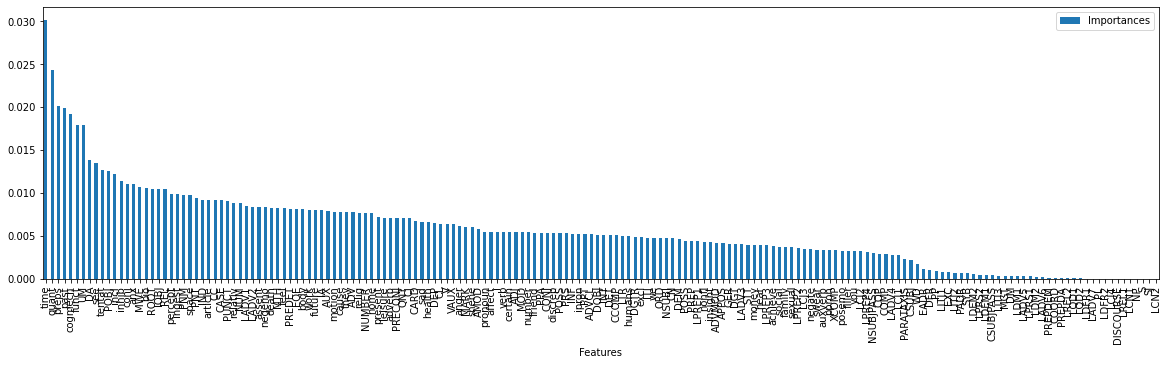

In [71]:
importances = classifier.feature_importances_
final_df = pd.DataFrame({"Features": fn, "Importances":importances})
#final_df.set_index('Importances')
final_df = final_df.sort_values(by=['Importances'], ascending=False)
final_df.plot(x ='Features', y='Importances', kind = 'bar', figsize=(20,5))

In [72]:
import eli5
eli5.sklearn.explain_prediction.explain_prediction_tree_classifier(
    classifier,
    X[0], 
    top=X.shape[0],
    feature_names=fn
)

Explanation(estimator='RandomForestClassifier(bootstrap=False, max_depth=10, n_estimators=200,\n                       random_state=42)', description='\nFeatures with largest coefficients per class.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision path', is_regression=False, targets=[TargetExplanation(target='Chronicle', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=0.09774436090225554, std=None, value=1.0), FeatureWeight(feature='quant', weight=0.011374145720189856, std=None, value=265.0), FeatureWeight(feature='assent', weight=0.008036576828849345, std=None, value=33.0), FeatureWeight(feature='LTR', weight=0.007945424974307476, std=None, value=58.0), FeatureWeight(feature='QNT', weight=0.004522172223940098, std=None, value=72.0), FeatureWeight(feature='see', weight=0.004387491710493795, std=None, value=101.0), FeatureWeight(feature='CC', weight=0.004008426077268119, std=None, value=483.0), FeatureWeight(feature='past', weight=0.0034937782271862302, std=None, value=157.0), FeatureWeight(feature='percept', weight=0.0034112684368748005, std=None, value=356.0), FeatureWeight(feature='bio', weight=0.003258149674129171, std=None, value=482.0), FeatureWeight(feature='they', weight=0.003125008963352255, std=None, value=189.0), FeatureWeight(feature='sad', weight=0.0025357344258693697, std=None, value=169.0), FeatureWeight(feature='tentat', weight=0.0021474702015504203, std=None, value=623.0), FeatureWeight(feature='funct', weight=0.0020517207049573706, std=None, value=2980.0), FeatureWeight(feature='PREP', weight=0.0019609453993933265, std=None, value=813.0), FeatureWeight(feature='humans', weight=0.0018571428571428573, std=None, value=315.0), FeatureWeight(feature='GER', weight=0.0017955232909860857, std=None, value=44.0), FeatureWeight(feature='achieve', weight=0.001750986810436122, std=None, value=74.0), FeatureWeight(feature='present', weight=0.0016553123497883115, std=None, value=450.0), FeatureWeight(feature='certain', weight=0.0016253616402507674, std=None, value=68.0), FeatureWeight(feature='ADJ', weight=0.0013795782371438115, std=None, value=466.0), FeatureWeight(feature='CCOMP', weight=0.001373874749261746, std=None, value=76.0), FeatureWeight(feature='body', weight=0.0013525602606968617, std=None, value=193.0), FeatureWeight(feature='CL', weight=0.0013358849353694966, std=None, value=317.0), FeatureWeight(feature='NSUBJPASS', weight=0.0010828757306504788, std=None, value=1.0), FeatureWeight(feature='i', weight=0.0010730790534715972, std=None, value=112.0), FeatureWeight(feature='we', weight=0.0010130151768439491, std=None, value=3.0), FeatureWeight(feature='verb', weight=0.0010091010266683731, std=None, value=667.0), FeatureWeight(feature='ppron', weight=0.0009540448563391602, std=None, value=1014.0), FeatureWeight(feature='LADV2', weight=0.0009512686563188583, std=None, value=12.0), FeatureWeight(feature='you', weight=0.0009373884486328265, std=None, value=763.0), 